# Implementing Deutsch-Jozsa Algorithm

## Importing Libraries

In [1]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit import Aer, execute
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator

## Quantum Oracle

In [2]:
def dj_oracle(n,case):
    oracle_qc = QuantumCircuit(n+1)
    if case == 'constant':
        function_output = np.random.randint(2)
        if function_output == 1:
            oracle_qc.x(n)
    if case == 'balanced':
        b = np.random.randint(2**n)
        b_str = format(b,'0'+str(n)+'b')   # bits for wrapping 
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        for i in range(n):
            oracle_qc.cx(i,n)
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = 'Oracle'
    return oracle_gate

## Deutsch-Jozsa Algorithm

In [3]:
def dj_algorithm(n,oracle):
    algo_qc = QuantumCircuit(n+1,n)
    algo_qc.x(n)
    for i in range(n+1):
        algo_qc.h(i)
    algo_qc.append(oracle,range(n+1))
    for i in range(n+1):
        algo_qc.h(i)
    for j in range(n):    
        algo_qc.measure(j,j)
    return algo_qc

## Executing the algorithm for balanced case

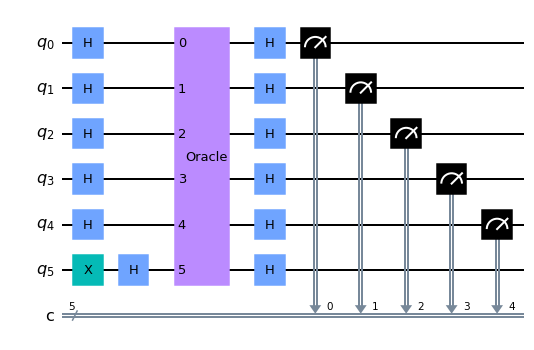

In [10]:
n = 5
case = 'balanced'
oracle = dj_oracle(n,case)
qc = dj_algorithm(n,oracle)
qc.draw('mpl')

## Getting output through a simulator

In [5]:
job = execute(qc, backend=QasmSimulator(), shots=1024)
results = job.result()
counts = results.get_counts()

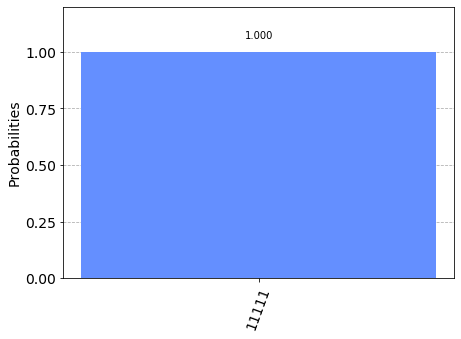

In [6]:
plot_histogram(counts)

## Executing the algorithm for constant case

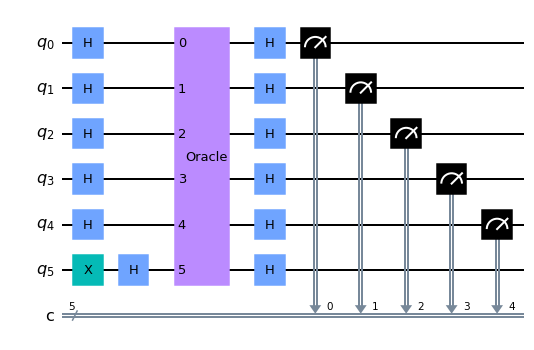

In [7]:
n = 5
case = 'constant'
oracle = dj_oracle(n,case)
qc = dj_algorithm(n,oracle)
qc.draw('mpl')

## Getting output through the simulator

In [8]:
job = execute(qc, backend=QasmSimulator(), shots=1024)
results = job.result()
counts = results.get_counts()

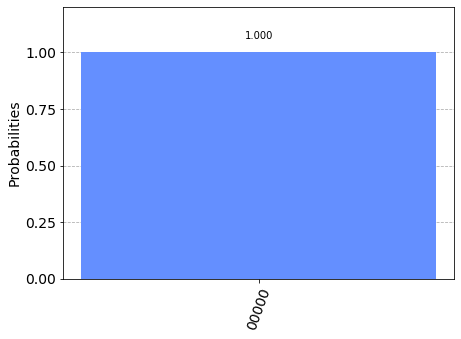

In [9]:
plot_histogram(counts)